# Sentiment Analysis of Online Reviews Project

# 1. Data Collection

In [ ]:
import pandas as pd

file_path = '/content/IMDB_Dataset.csv'
try:
    df = pd.read_csv(file_path, skiprows=range(11949, 11950), header=None)
    print(f"Successfully read {len(df)} rows after skipping the problematic row.")
except Exception as e:
    print(f"Encountered an error: {e}")

df.head()

Successfully read 40000 rows after skipping the problematic row.


,0,1
0,text,label
1,I grew up (b. 1965) watching and loving the Th...,0
2,"When I put this movie in my DVD player, and sa...",0
3,Why do people who do not know what a particula...,0
4,Even though I have great interest in Biblical ...,0


# 2. Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
import nltk

# Rename columns
df.columns = ['text', 'sentiment']

# Remove rows with missing values
df.dropna(inplace=True)

# Text cleaning
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<.*?>', '', text) # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words]) # Remove stopwords
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# Tokenization and Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['sentiment']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (32000, 5000)
X_test shape: (8000, 5000)
y_train shape: (32000,)
y_test shape: (8000,)


In [ ]:
print("First few rows of X_train:")
print(X_train[:5])

print("First few rows of X_test:")
print(X_test[:5])

print("First few values of y_train:")
print(y_train[:5])

print("First few values of y_test:")
print(y_test[:5])


First few rows of X_train:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First few rows of X_test:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First few values of y_train:
14307    1
17812    1
11020    1
15158    0
24990    0
Name: sentiment, dtype: object
First few values of y_test:
32823    0
16298    1
28505    0
6689     0
26893    1
Name: sentiment, dtype: object


# 3. Exploratory Data Analysis (EDA)

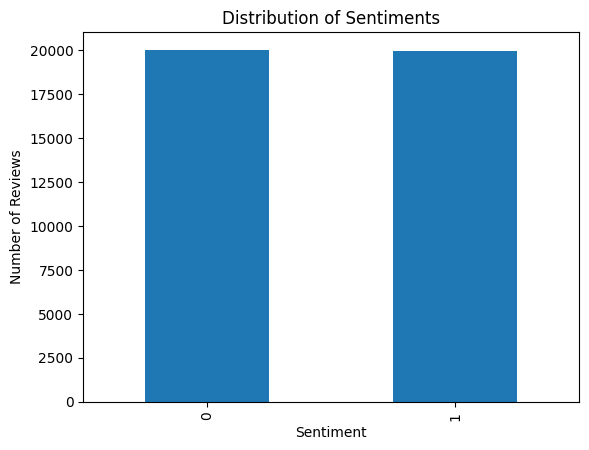

In [ ]:
import matplotlib.pyplot as plt

# Filter out the rows where the sentiment is 'label'
df_filtered = df[df['sentiment'] != 'label']

df_filtered['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [ ]:
!pip install wordcloud

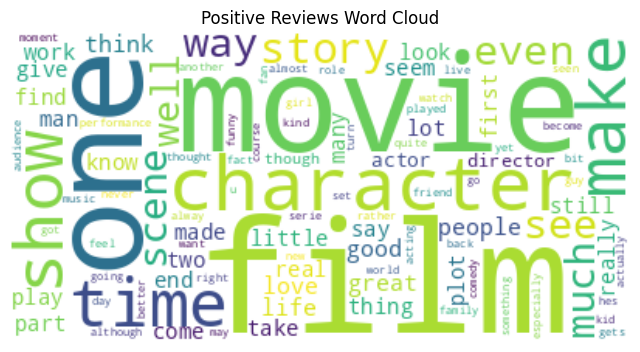

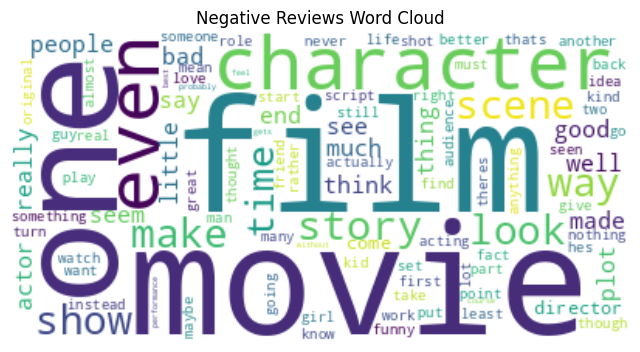

In [ ]:
from wordcloud import WordCloud

df_filtered = df[df['sentiment'].isin(['0', '1'])]

positive_text = ' '.join(df_filtered[df_filtered['sentiment'] == '1']['cleaned_text'].astype(str))
negative_text = ' '.join(df_filtered[df_filtered['sentiment'] == '0']['cleaned_text'].astype(str))

if positive_text:
    positive_wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(positive_text)
    plt.figure(figsize=(8, 8))
    plt.imshow(positive_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title('Positive Reviews Word Cloud')
    plt.show()
else:
    print("No positive reviews found.")

if negative_text:
    negative_wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(negative_text)
    plt.figure(figsize=(8, 8))
    plt.imshow(negative_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title('Negative Reviews Word Cloud')
    plt.show()
else:
    print("No negative reviews found.")


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df_filtered['cleaned_text'])

df_filtered_copy = df_filtered.copy()

df_filtered_copy['review_length'] = df_filtered_copy['cleaned_text'].apply(lambda x: len(x.split()))

X_combined = hstack((X, df_filtered_copy['review_length'].values.reshape(-1,1)))

y = df_filtered['sentiment'].astype(int)

y

1        0
2        0
3        0
4        0
5        1
        ..
39995    1
39996    1
39997    0
39998    1
39999    1
Name: sentiment, Length: 39999, dtype: int64

# 4. Feature Engineering

# 5. Model Selection and Training

# 6. Model Evaluation

# 7. Interpretation and Reporting